### Homework

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

In [52]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Choose 4 hyperparameters and create lists of the different options

learning_rates = [0.001, 0.01, 0.05]
batch_sizes = [8, 16, 32, 64]
optimizers = ['SGD', 'Adam', 'Adagrad', 'RMSprop']
initializers = ['uniform', 'normal', 'he_normal', 'lecun_uniform', 'glorot_uniform']

In [59]:
# Create randomly hyperparameters in the list and put in dictionary

import random

hp={'lr':random.choice(learning_rates), 
    'bs':random.choice(batch_sizes),
    'op':random.choice(optimizers),
    'in':random.choice(initializers)}

def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

for i in range(9):
  append_value(hp, 'lr', random.choice(learning_rates))
  append_value(hp, 'bs', random.choice(batch_sizes))
  append_value(hp, 'op', random.choice(optimizers))
  append_value(hp, 'in', random.choice(initializers))

In [60]:
print(*hp.items(), sep='\n')

('lr', [0.01, 0.01, 0.001, 0.05, 0.01, 0.05, 0.05, 0.05, 0.01, 0.05])
('bs', [32, 8, 64, 8, 16, 64, 16, 32, 8, 8])
('op', ['RMSprop', 'Adam', 'RMSprop', 'Adagrad', 'Adam', 'RMSprop', 'Adam', 'Adagrad', 'Adagrad', 'RMSprop'])
('in', ['lecun_uniform', 'uniform', 'glorot_uniform', 'normal', 'glorot_uniform', 'uniform', 'normal', 'uniform', 'uniform', 'he_normal'])


In [61]:
# Train and Test datasets
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [62]:
# Name of the label (10 labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
# We have 60 000 images for the training datasets and 10 000 images for the test dataset. 28 x 28 pixels.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


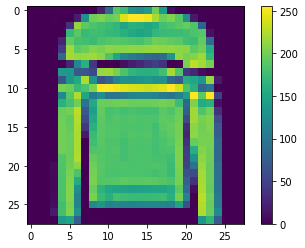

In [64]:
# The data must be preprocessed before training the network.
# The pixel values fall in the range of 0 to 255.

plt.figure()
plt.imshow(X_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [65]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.

X_train = X_train / 255.0
X_test = X_test / 255.0

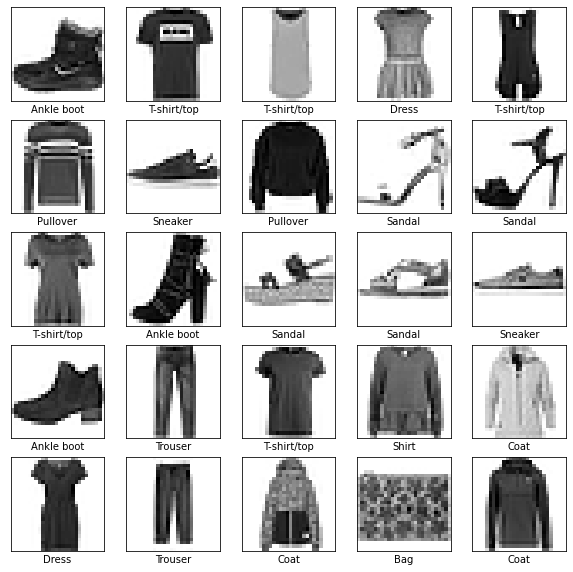

In [66]:
# Verify that the data is in the correct format and that you're ready to build and train the network.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [67]:
df_list = []
random.seed(111)

for i in range(10):
  K.clear_session()

  # Setup the layers
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))                                      # Transforms the format of the images from a two-dimensional array (of 28 by 28 pixels).
  model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer=hp['in'][i]))      # The first Dense layer has 128 nodes (or neurons).
  model.add(tf.keras.layers.Dense(10, activation ='softmax'))                                   # The second (and last) layer returns a logits array with length of 10.
    
  model.compile(loss='SparseCategoricalCrossentropy',
                optimizer=eval(str(hp['op'][i])+'(lr='+str(hp['lr'][i])+')'),
                metrics=['accuracy'])
  h = model.fit(X_train, y_train, batch_size=hp['bs'][i], epochs=10, validation_split=0.2)
    
  df_list.append(pd.DataFrame(h.history, index=h.epoch))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8704 - accuracy: 0.7427 - val_loss: 0.6437 - val_accuracy: 0.8192
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5280 - accuracy: 0.8325 - val_loss: 0.4794 - val_accuracy: 0.8478
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5132 - accuracy: 0.8386 - val_loss: 0.6149 - val_accuracy: 0.8488
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4857 - accuracy: 0.8527 - val_loss: 0.6369 - val_accuracy: 0.8318
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4914 - accuracy: 0.8544 - val_loss: 0.6624 - val_accuracy: 0.8317
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5046 - accuracy: 0.8525 - val_loss: 0.5561 - val_accuracy: 0.8525
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4970 - accuracy: 0.8549 - val_loss: 0.6899 - val_accuracy:

In [68]:
# Input result in dataframe

history_df = pd.concat(df_list, axis=1)
metrics_reported = df_list[0].columns
model = [1,2,3,4,5,6,7,8,9,10]
idx = pd.MultiIndex.from_product([model, metrics_reported],
                                 names=['Model', 'Metric'])
history_df.columns = idx
history_df

Model         1                       ...        10                       
Metric      loss  accuracy  val_loss  ...  accuracy  val_loss val_accuracy
0       0.630487  0.792104  0.643668  ...  0.496125  1.459330     0.510167
1       0.525677  0.833583  0.479363  ...  0.513167  1.737191     0.488500
2       0.511567  0.842417  0.614931  ...  0.510333  1.960253     0.500750
3       0.507996  0.846104  0.636900  ...  0.510375  2.395890     0.427250
4       0.512957  0.850021  0.662365  ...  0.502521  2.618517     0.495917
5       0.512416  0.852396  0.556145  ...  0.506646  1.933799     0.481750
6       0.520935  0.851937  0.689920  ...  0.499667  2.778275     0.517917
7       0.523469  0.852250  0.660369  ...  0.494833  1.995163     0.457083
8       0.525881  0.851083  0.772911  ...  0.504833  2.554132     0.513250
9       0.529839  0.853396  0.714146  ...  0.503875  2.342130     0.496500

[10 rows x 40 columns]

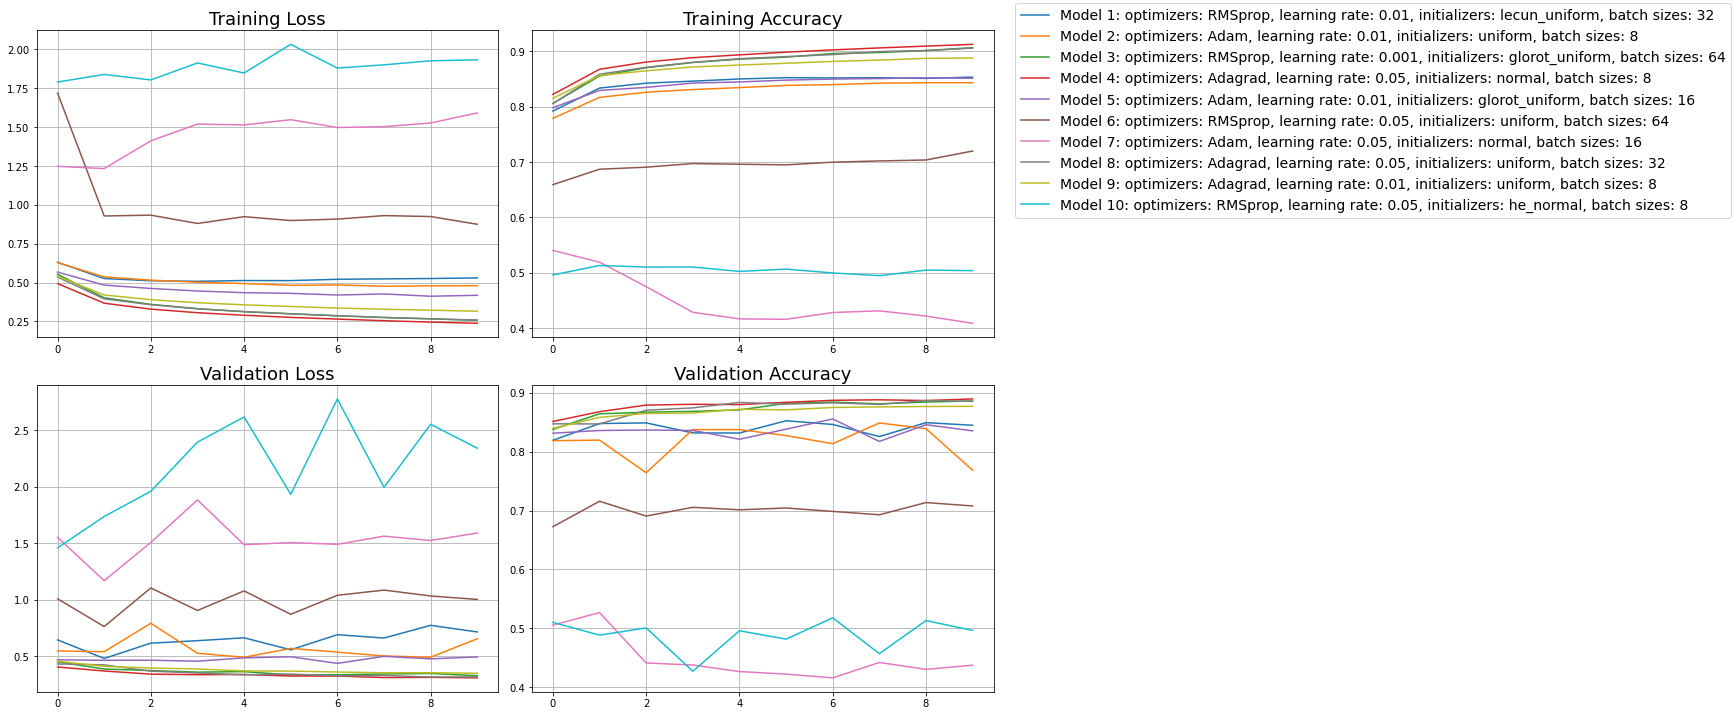

In [69]:
# Graph
fig, axs = plt.subplots(2, 2, figsize=(14,10))

for i,j in zip(range(0,40,4), range(10)):
  axs[0,0].plot(history_df.iloc[:,[i]], label= 'Model '+ str(j+1) 
          +': optimizers: ' + str(hp['op'][j]) + ', learning rate: ' 
          + str(hp['lr'][j]) + ', initializers: ' + str(hp['in'][j]) 
          + ', batch sizes: ' + str(hp['bs'][j]))
  axs[0,1].plot(history_df.iloc[:,[i+1]])
  axs[1,0].plot(history_df.iloc[:,[i+2]])
  axs[1,1].plot(history_df.iloc[:,[i+3]])

axs[0,0].set_title('Training Loss', fontsize=18)
axs[0,1].set_title('Training Accuracy', fontsize=18)
axs[1,0].set_title('Validation Loss', fontsize=18)
axs[1,1].set_title('Validation Accuracy', fontsize=18)

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)

fig.tight_layout()
fig.legend(bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 14})

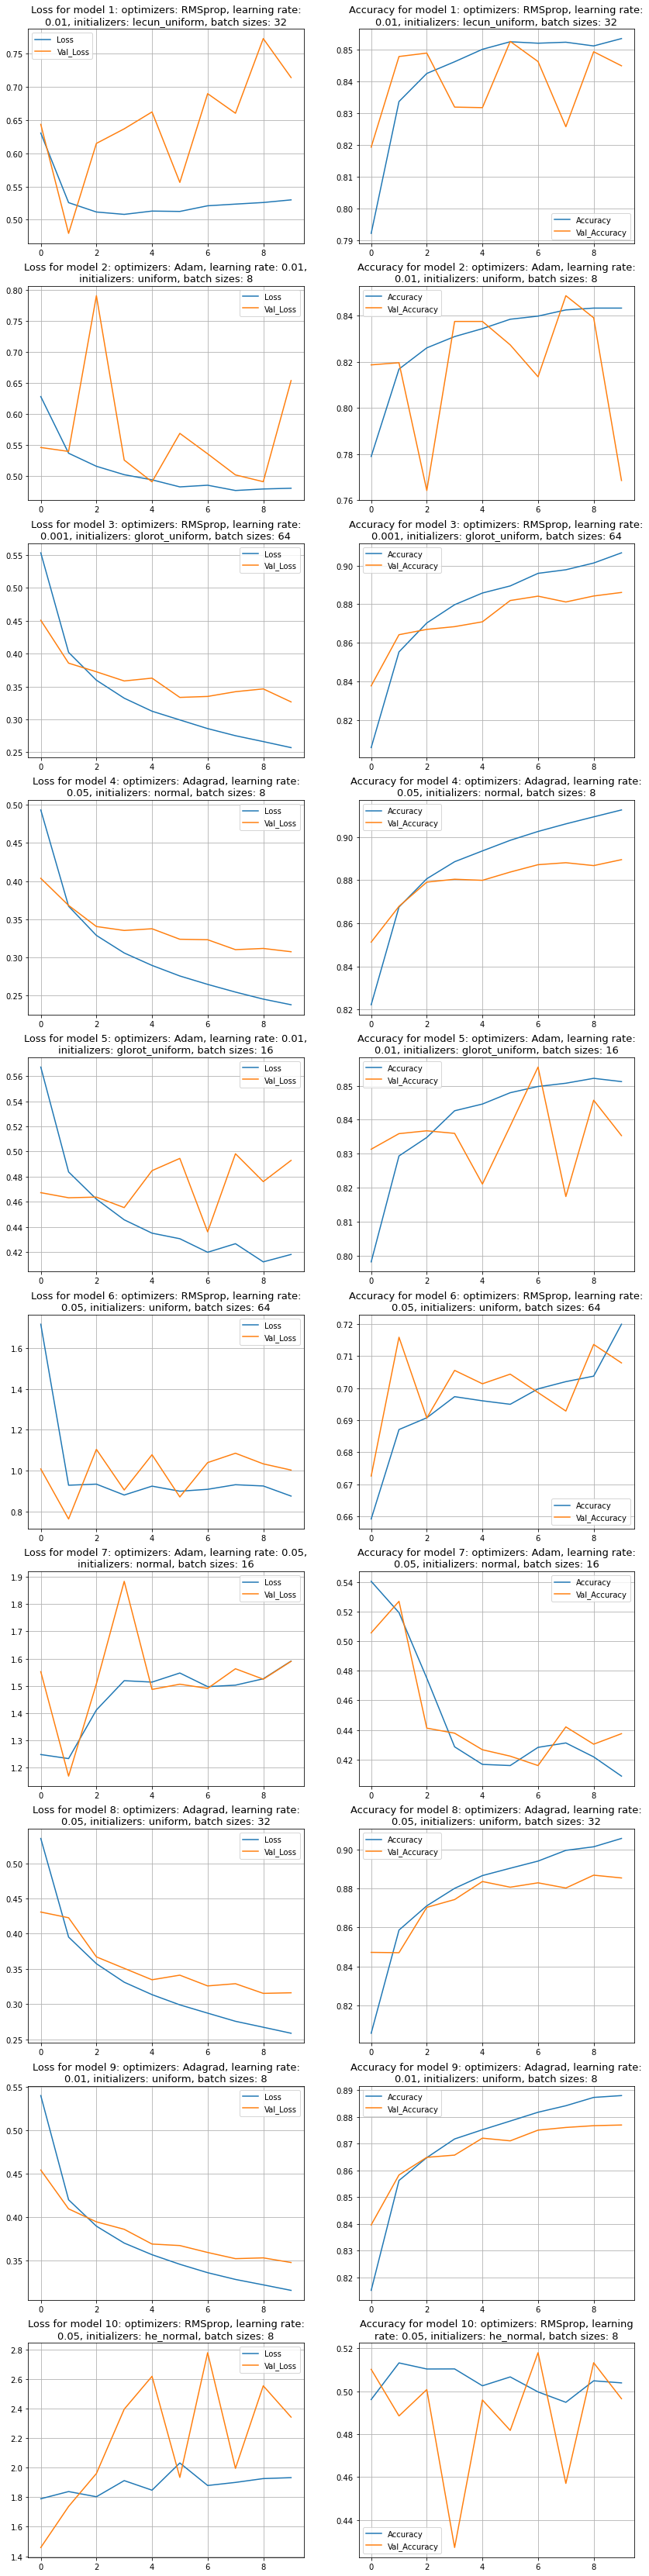

In [128]:
from textwrap import wrap

# Graph
fig, axs = plt.subplots(10, 2, figsize=(14,60))

for i,j in zip(range(0,40,4), range(10)):

  axs[j,0].plot(history_df.iloc[:,[i]], label='Loss')
  axs[j,0].plot(history_df.iloc[:,[i+2]], label='Val_Loss')
  axs[j,1].plot(history_df.iloc[:,[i+1]], label='Accuracy')
  axs[j,1].plot(history_df.iloc[:,[i+3]], label='Val_Accuracy')

  axs[j,0].legend()
  axs[j,1].legend()

  axs[j,0].set_title('\n'.join(wrap(str('Loss for model '+ str(j+1) +':' 
          + ' optimizers: ' + str(hp['op'][j]) + ', learning rate: ' 
          + str(hp['lr'][j]) + ', initializers: ' + str(hp['in'][j]) 
          + ', batch sizes: ' + str(hp['bs'][j])),57)), fontsize=13)
  axs[j,1].set_title('\n'.join(wrap(str('Accuracy for model '+ str(j+1) +':' 
          + ' optimizers: ' + str(hp['op'][j]) + ', learning rate: ' 
          + str(hp['lr'][j]) + ', initializers: ' + str(hp['in'][j]) 
          + ', batch sizes: ' + str(hp['bs'][j])),57)), fontsize=13)   

  axs[j,0].grid(True)
  axs[j,1].grid(True)


